In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotnine as pn
import seaborn as sns 

import utils



In [40]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/projects/Keio Testing_analysis/src/utils.py'>

In [43]:
subjs = utils.ExpInfo.getSubjIDs()


# One dots

In [47]:
task = utils.ExpInfo.taskName[0]
df = [utils.LoadData.behaviorData(x, task) for x in subjs]
df = pd.concat(df)
# df['accuracy'] = df['accuracy']=='correct'

In [55]:
df_ = df[['group', 'participant', 'actual control', 'angular bias', 'response']]
df_ = df_.groupby(['group', 'participant', 'actual control', 'angular bias']).mean().reset_index()
df_=  df_.sort_values(['group', 'participant']).reset_index()


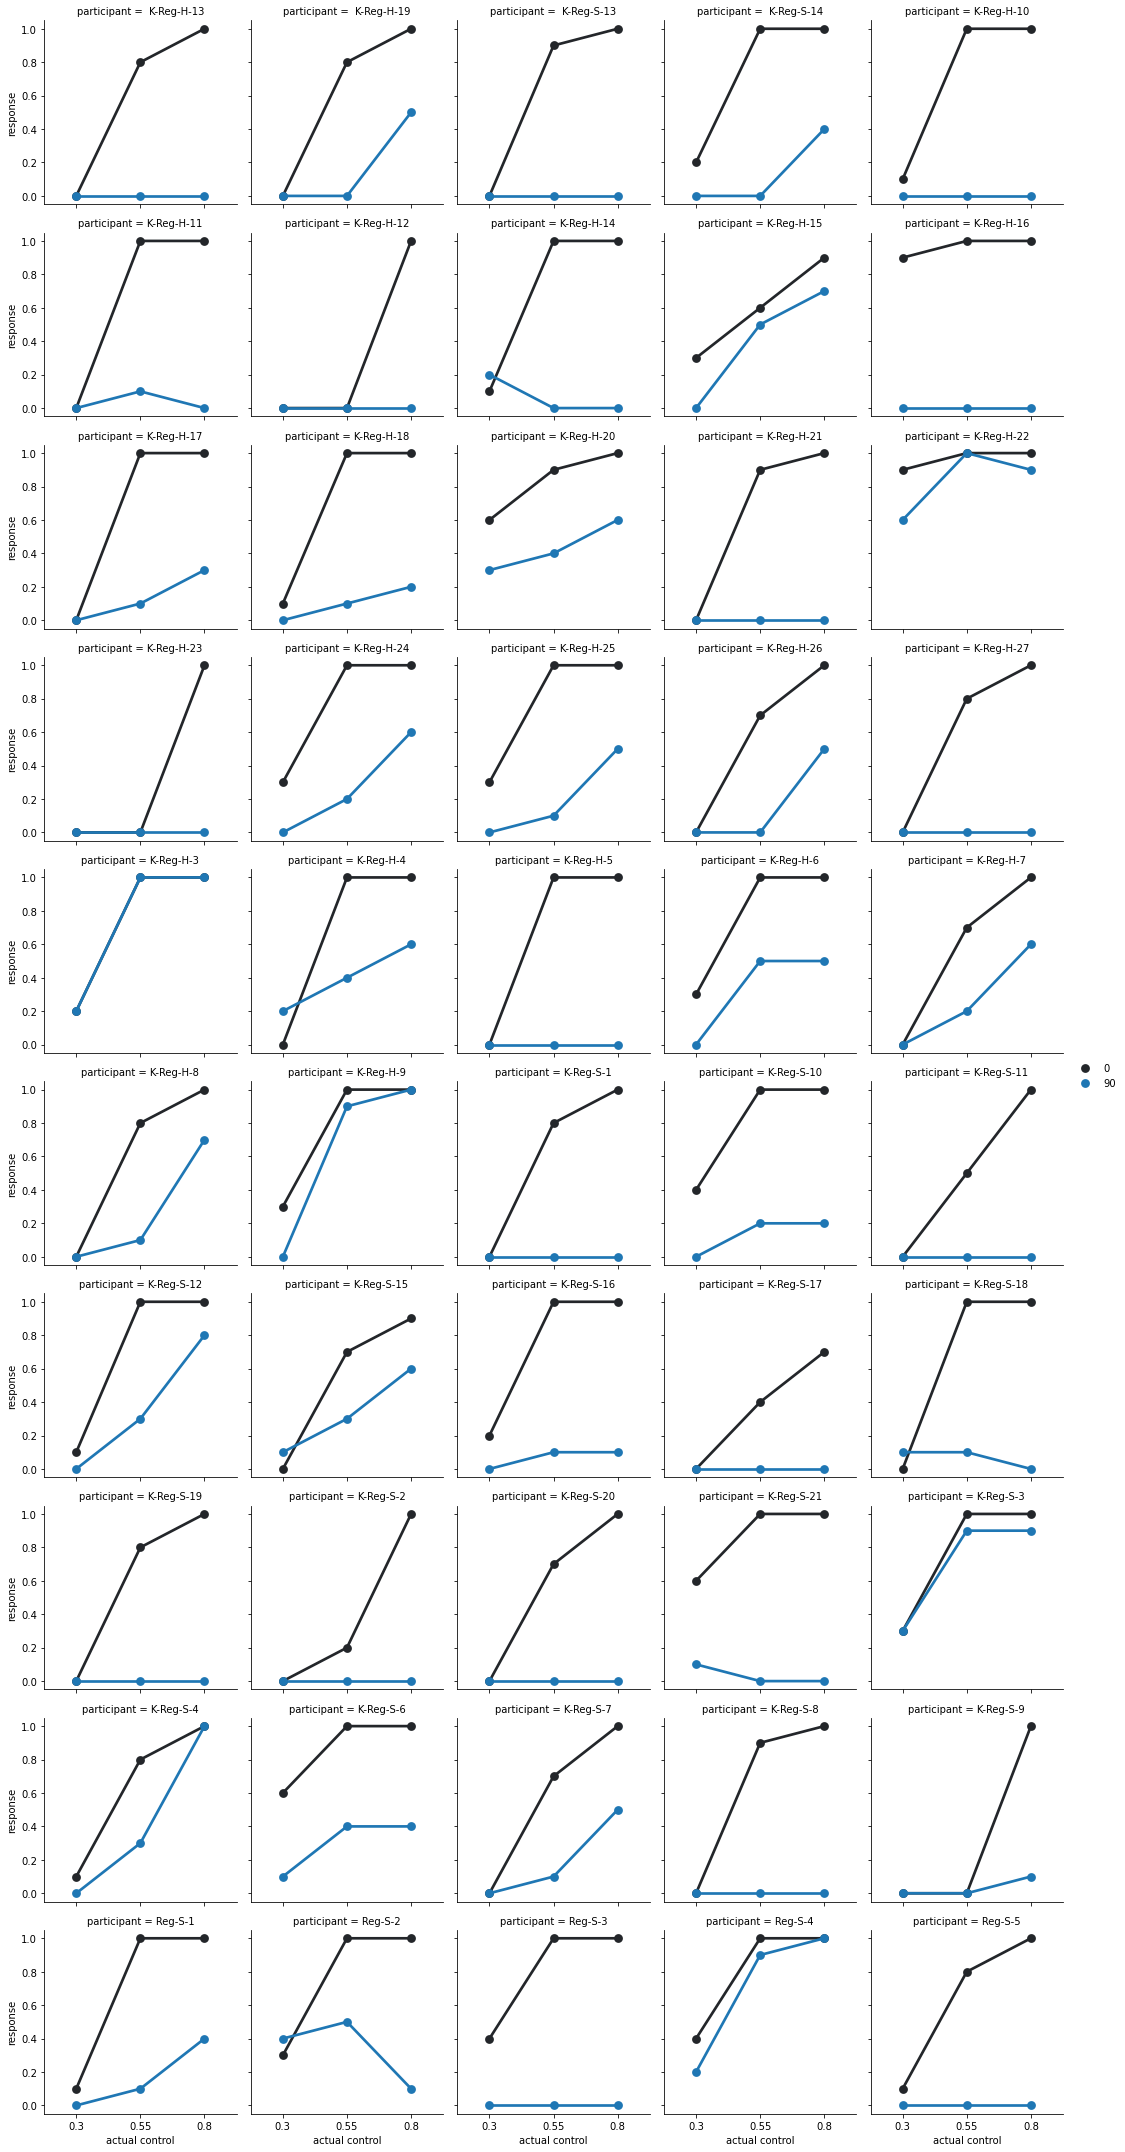

In [54]:
grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_)
grid.map_dataframe(sns.pointplot, 
                   x='actual control', 
                   y='response', 
                   hue='angular bias')
grid.add_legend()

# three dots

In [44]:
task = utils.ExpInfo.taskName[1]
df = [utils.LoadData.behaviorData(x, task) for x in subjs]
df = pd.concat(df)
df['accuracy'] = df['accuracy']=='correct'

,participant,trial no.,target dot,actual control,angular bias,selected dot,accuracy,group
0,K-Reg-H-10,1,2,0.30,0,1,False,H
1,K-Reg-H-10,2,2,0.55,0,1,False,H
2,K-Reg-H-10,3,3,0.30,90,1,False,H
3,K-Reg-H-10,4,3,0.55,0,3,True,H
4,K-Reg-H-10,5,3,0.30,90,3,True,H


In [45]:
df_ = df[['participant', 'actual control', 'angular bias', 'accuracy']]
df_ = df_.groupby(['participant', 'actual control', 'angular bias']).mean().reset_index()
# df_.head()

,participant,actual control,angular bias,accuracy
0,K-Reg-H-10,0.30,0,0.3
1,K-Reg-H-10,0.30,90,0.6
2,K-Reg-H-10,0.55,0,0.9
3,K-Reg-H-10,0.55,90,1.0
4,K-Reg-H-10,0.80,0,1.0


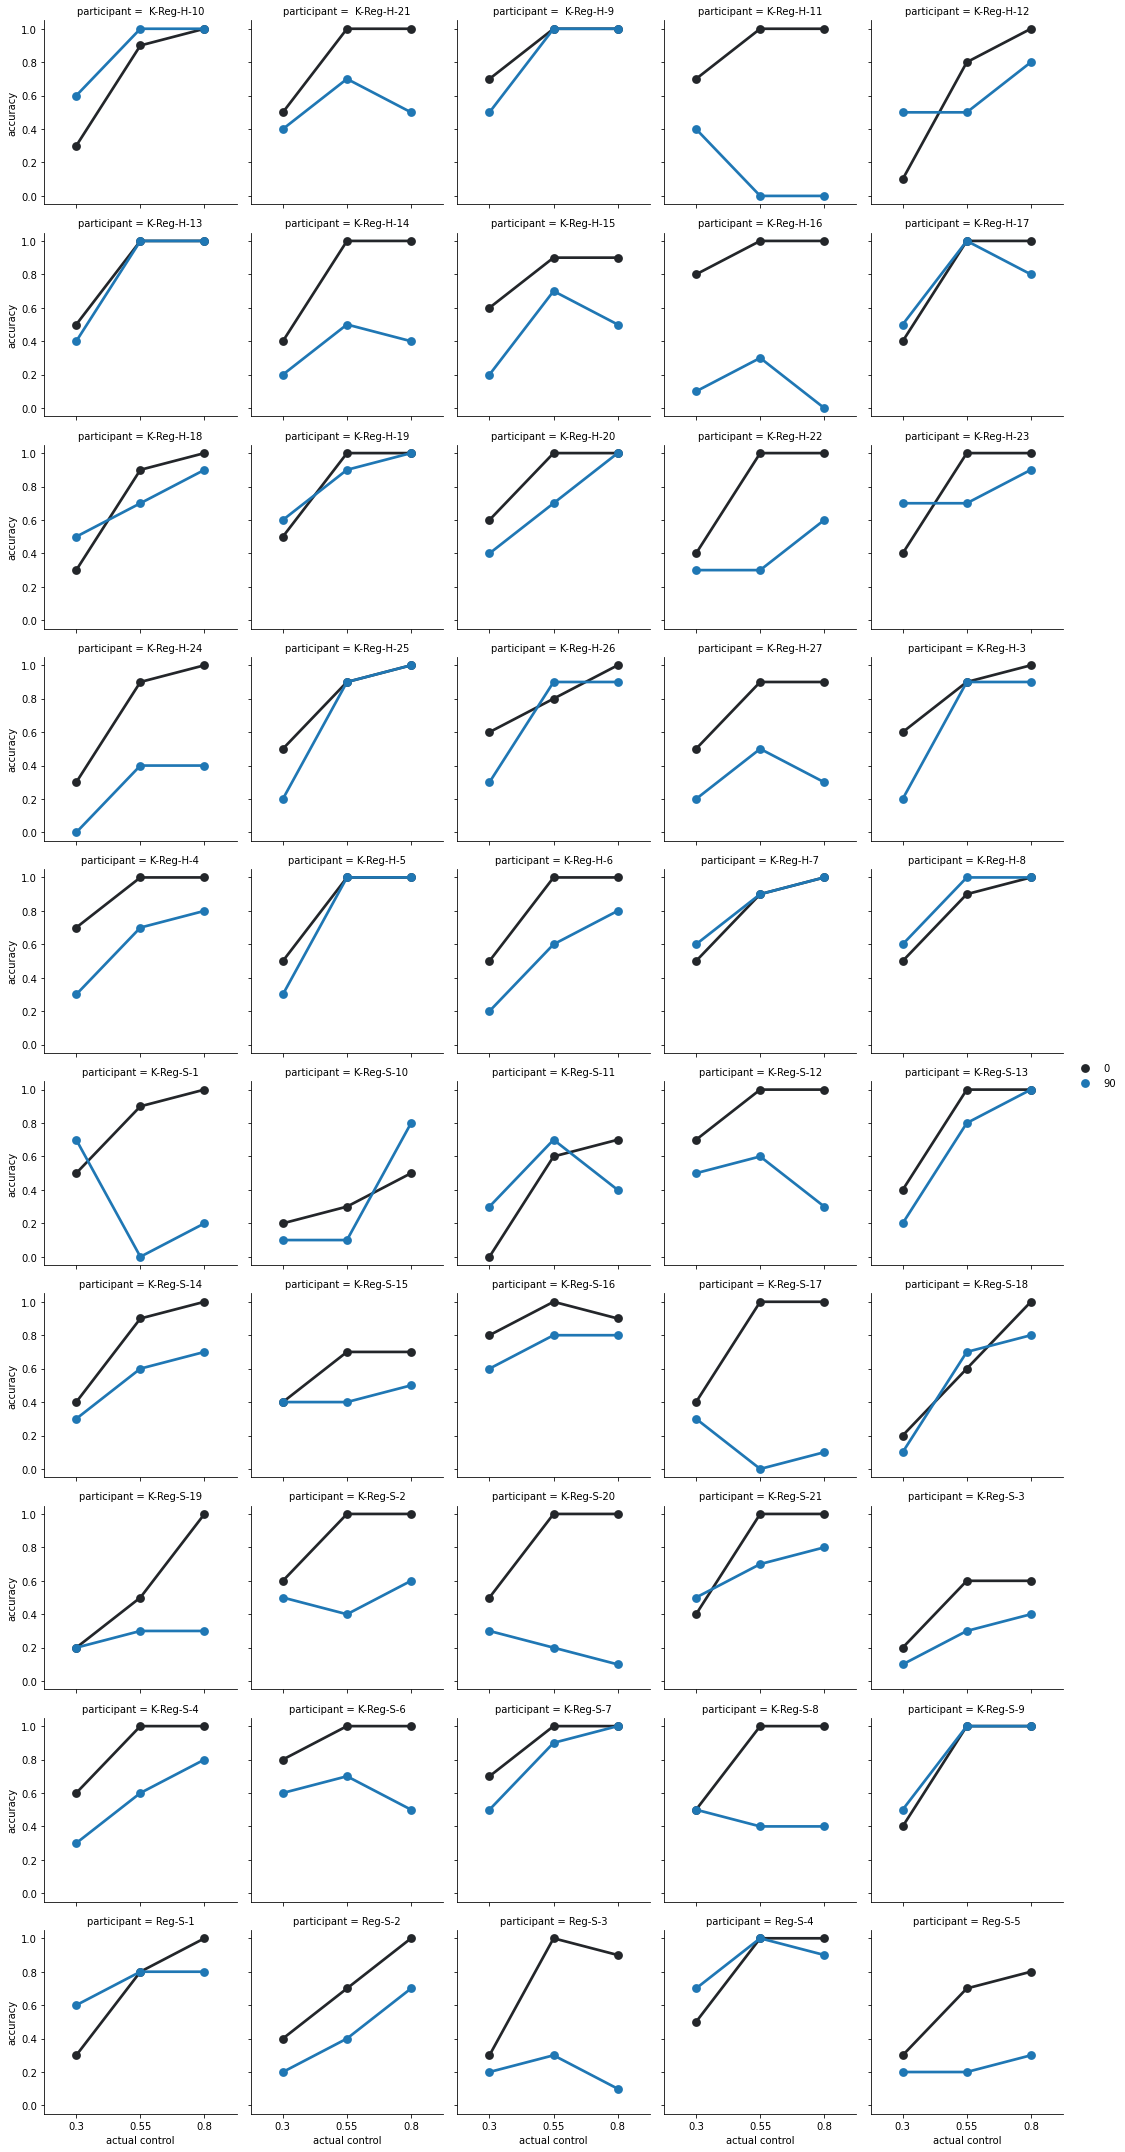

In [46]:
grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_)
grid.map_dataframe(sns.pointplot, 
                   x='actual control', 
                   y='accuracy', 
                   hue='angular bias')
grid.add_legend()

In [37]:
# np.where(df['participant'] == 'K-Reg-S-1')
df



,participant,trial no.,target dot,actual control,angular bias,selected dot,accuracy,group
0,K-Reg-H-10,1,2,0.30,0,1,False,H
1,K-Reg-H-10,2,2,0.55,0,1,False,H
2,K-Reg-H-10,3,3,0.30,90,1,False,H
3,K-Reg-H-10,4,3,0.55,0,3,True,H
4,K-Reg-H-10,5,3,0.30,90,3,True,H
...,...,...,...,...,...,...,...,...
55,Reg-S-5,56,1,0.30,90,3,False,S
56,Reg-S-5,57,2,0.80,90,2,True,S
57,Reg-S-5,58,1,0.55,0,1,True,S
58,Reg-S-5,59,3,0.80,0,3,True,S


In [41]:
a = utils.LoadData.behaviorData('K-Reg-S-1', task)
b = utils.LoadData.behaviorData('K-Reg-S-3', task)

In [42]:
pd.concat([a, b])

,participant,trial no.,target dot,actual control,angular bias,selected dot,accuracy,group
0,K-Reg-S-1,1,2,0.30,0,1,incorrect,S
1,K-Reg-S-1,2,2,0.55,0,2,correct,S
2,K-Reg-S-1,3,3,0.30,90,1,incorrect,S
3,K-Reg-S-1,4,3,0.55,0,3,correct,S
4,K-Reg-S-1,5,3,0.30,90,3,correct,S
...,...,...,...,...,...,...,...,...
55,K-Reg-S-3,56,2,0.30,90,1,incorrect,S
56,K-Reg-S-3,57,3,0.80,0,1,incorrect,S
57,K-Reg-S-3,58,3,0.30,90,2,incorrect,S
58,K-Reg-S-3,59,3,0.30,0,1,incorrect,S
